#**EE769 Introduction to Machine Learning**

#Assignment 1: Gradient Descent, Linear Regression, and Regularization


**Template and Instructions**



1. Up to two people can team up, but only one should submit, and both should understand the entire code.
2. Every line of code should end in a comment explaining the line
3. It is recommended to solve the assignment in Google Colab.
Write your roll no.s separated by commas here: 
4. Write your names here: 
5. There are two parts to the assignment. In the Part 1, the code format has to be strictly followed to enable auto-grading. In the second part, you can be creative.
6. **You can discuss with other groups or refer to the internet without being penalized, but you cannot copy their code and modify it. Write every line of code and comment on your own.**

#**Part 1 begins ...**
**Instructions to be strictly followed:**

1. Do not add any code cells or markdown cells until the end of this part. Especially, do not change the blocks that say "TEST CASES, DO NOT CHANGE"
2. In all other cells only add code where it says "CODE HERE".
3. If you encounter any raise NotImplementedError() calls you may comment them out.

We cannot ensure correct grading if you change anything else, and you may be penalised for not following these instructions.

## Import Statements

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Normalize function 



In [2]:
def Normalize(X): # Output should be a normalized data matrix of the same dimension
    '''
    Normalize all columns of X using mean and standard deviation
    '''
    X = X.astype(np.float) # converting the array into a float array
    if len(X.shape)==2:
      k = X.shape[1] #num of columns in the matrix
      n = X.shape[0] #num of rows in the matrix
      for i in range(k):
        m = X[:,i].mean()  #calculating the mean for the column
        s = X[:,i].std()  #evaluating the standard deviation for the column
        for j in range(n):
          X[j][i]= (X[j][i]-m)/s  #updating the element by using mean and standard deviation
      return X
    else: #For one dimensional arrays
      X =(X-X.mean())/X.std() 
      return X
    #raise NotImplementedError()

In [3]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - 1 dimensional array'''
#X=np.array([[1,2,3],[3,4,5],[7,8,9]])
X1=np.array([1,2,3])
np.testing.assert_array_almost_equal(Normalize(X1),np.array([-1.224,  0.      ,  1.224]),decimal=3)
''' case 2 - 2 dimensional array'''
X2=np.array([[4,7,6],[3,8,9],[5,11,10]])
np.testing.assert_array_almost_equal(Normalize(X2),np.array([[ 0.  , -0.980581, -1.372813],[-1.224745, -0.392232,  0.392232],[ 1.224745,  1.372813,  0.980581]]))
''' case 3 - 1 dimensional array with float'''
X3=np.array([5.5,6.7,3.2,6.7])
np.testing.assert_array_almost_equal(Normalize(X3),np.array([-0.017,  0.822, -1.627,  0.822]),decimal=3)

## Prediction Function

Given X and w, compute the predicted output. Do not forget to add 1's in X

In [4]:
def Prediction (X, w): # Output should be a prediction vector y
    '''
    Compute Prediction given an input datamatrix X and weight vecor w. Output y = [X 1]w where 1 is a vector of all 1s 
    '''
    n = X.shape[0] #Number of rows in the numpy array X
    list_1 = np.array([[1] for i in range(n)]) #Creating an array of lists for adding to the last column
    updated_X = np.append(X,list_1,axis=1) #Appending the above list into the given array as column
    Y = np.matmul(updated_X,w) #As per the given information(formula)
    return Y
    #raise NotImplementedError()


In [5]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - Known input output matrix and weights 1'''
X1 = np.array([[3,2],[1,1]])
w1 = np.array([2,1,1]) 
np.testing.assert_array_equal(Prediction(X1,w1),np.array([9,4]))


## Loss Functions

Code the four  loss functions:

1. MSE loss is only for the error
2. MAE loss is only for the error
3. L2 loss is for MSE and L2 regularization, and can call MSE loss
4. L1 loss is for MSE and L1 regularization, and can call MSE loss

In [6]:
def MSE_Loss (X, t, w, lamda =0): # Ouput should be a single number
    '''
    lamda=0 is a default argument to prevent errors if you pass lamda to a function that doesn't need it by mistake. 
    This allows us to call all loss functions with the same input format.
    
    You are encouraged read about default arguments by yourself online if you're not familiar.
    '''
    p = Prediction(X,w) #We will need the predicted values for calculating the mse loss
    n = len(t) #length of the target values array
    mse_loss = np.sum(np.square(p-t))/n #Calculating the mean squared error using the numpy functions on arrays
    return mse_loss
    #raise NotImplementedError()

In [7]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MSE_Loss(X,t,w),0.53,decimal=3)


In [8]:
def MAE_Loss (X, t, w, lamda = 0): # Output should be a single number
  p = Prediction(X,w) #We will need the predicted values for calculating the mae loss
  n = X.shape[0] #Number of rows in matrix X.
  mae_loss = (1/n)*sum(abs(p[i]-t[i]) for i in range(n)) #Calculating the mean absolute error using the python inbuilt sum function
  return mae_loss
  #raise NotImplementedError()

In [9]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(MAE_Loss(X,t,w),0.700,decimal=3)


In [10]:
def L2_Loss (X, t, w, lamda): # Output should be a single number based on L2-norm (with sqrt)
    ''' Need to specify what inputs are'''
    n = X.shape[0] #Number of rows in the data matrix X
    k = w.shape[0] #Length of the given array of weights
    mse_loss = MSE_Loss(X, t, w, lamda =0) #Calculating mse loss using previously defined functiin for using directly in the L2 loss
    w[k-1]=0 #Putting the last term of the weight array equal to zero, as this element is the coefficient for biasness
    bias_l2 = lamda*(np.sqrt(sum(w[i]**2 for i in range(k)))) #We have take the norm for weights excluding the last element of the w vector.
    return mse_loss+bias_l2 #Using the formula
    #raise NotImplementedError()

In [11]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L2_Loss(X,t,w,0.5),1.675,decimal=3)


In [12]:
def L1_Loss (X, t, w, lamda): # Output should be a single number
    p = Prediction(X,w) #Calculating the predicted array for using in the further calculation directly.
    n = len(t) #Length of the target variables array
    k = w.shape[0] #Length of the weight array
    w[k-1] = 0 #For this last element denotes bias, hence taking it as zero.
    mse_loss = np.sum(np.square(p-t))/n #Using the numpy functions for calculating the mean squares error using formula
    bias_l1 = lamda*np.linalg.norm(w,1) #Calculating the L1 norm of w for finding the L1 biasness
    return mse_loss+bias_l1 #Using the formula
    #raise NotImplementedError()

In [13]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(L1_Loss(X,t,w,0.5),2.280,decimal=3)


In [14]:
def NRMSE_Metric (X, t, w, lamda=0): # Output should be a single number. RMSE/std_dev(t)
    n = X.shape[0] #Number of rows in X data matrix
    k = w.shape[0] #Number of elements in weight array
    rmse = np.sqrt(MSE_Loss(X, t, w, lamda =0)) #Calculating the root mean squared error using the pre defined function
    c = np.std(t) #Standard deviation of the target values
    nrmse = rmse/c #Using the NRMSE formula
    return nrmse
    #raise NotImplementedError()

In [15]:
'''
TEST CASES, DO NOT CHANGE
'''
''' Test case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_almost_equal(NRMSE_Metric(X,t,w,0.5),0.970,decimal=3)


## Gradient function
Each Loss function will have its own gradient function:

1. MSE gradient is only for the error
2. MAE gradient is only for the error
3. L2 gradient is for MSE and L2 regularization, and can call MSE gradient
4. L1 gradient is for MSE and L1 regularization, and can call MSE gradient

In [16]:
def MSE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    p = Prediction(X,w) #Calculating predicted values for using in further calculation
    n = X.shape[0] #Number of rows in the numpy array X
    list_1 = np.array([[1] for i in range(n)]) #Creating an array of lists containing element '1'
    updated_X = np.append(X,list_1,axis=1) #Adding a column with entries '1' at the end in X
    k = p.shape[0] #Number of predicted vslues
    m = w.shape[0] #Number of weight values
    #mse_grad =np.array([((2/n)*sum((p[i]-t[i])*updated_X[i][j] for i in range(k))) for j in range(m)]) #Extended form for the gradient(calculated by hand)
    mse_grad = (2/k)*(np.dot((p-t),updated_X)) #Calculating gradient using the numpy functions and by hand evaluation
    return mse_grad 
    #raise NotImplementedError()

In [17]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MSE_Gradient(X,t,w),np.array([2.55, 2.94, 2.9 , 0.4 ]),decimal=3)


In [18]:
def MAE_Gradient (X, t, w, lamda=0): # Output should have the same size as w
    p = Prediction(X,w) #Calculating predicted values for using in further calculation
    n = X.shape[0] #Number of rows in the numpy array X
    list_1 = np.array([[1] for i in range(n)])
    updated_X = np.append(X,list_1,axis=1) #Adding a column with entries '1' in matrix
    k = p.shape[0] #Number of predicted values
    m = w.shape[0] #Number of values in weight array
    mae_grad =np.array([((1/n)*sum((1*updated_X[i][j]) if p[i]>t[i] else (-1*updated_X[i][j]) for i in range(k))) for j in range(m)]) #calculating the gradient using the differentiation (expression evaluated manually)
    return mae_grad
    #raise NotImplementedError()

In [19]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(MAE_Gradient(X,t,w),np.array([0.75,  0.3 ,  0.5 , 0.]),decimal=3)


In [20]:
def L2_Gradient (X, t, w, lamda): # Output should have the same size as w
    mse_grad = MSE_Gradient(X, t, w, lamda=0) #Calculating mse gradient for using in further calculation
    n = w.shape[0] #Number of values in weight array
    w[len(w)-1]=0 #Taking the bias term as zero.
    l2_norm_grad = np.array([(lamda*w[j]/(np.linalg.norm(w,2))) for j in range(n)]) #Gradient of the second part of L2 loss function i.e. gradient of lamda*L2_Norm
    L2_Grad = mse_grad+l2_norm_grad #Calculating the total gradient
    return L2_Grad
    #raise NotImplementedError()

In [21]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L2_Gradient(X,t,w,0.5),np.array([2.986, 2.721, 3.009 , 0.4 ]),decimal=3)


In [22]:
def L1_Gradient (X, t, w, lamda): # Output should have the same size as w
    mse_grad = MSE_Gradient (X, t, w, lamda=0) #Calculating mse gradient for using in further calculation
    k = w.shape[0]  ##Number of values in weight array
    w[len(w)-1] = 0 #Taking the bias term as zero.
    l1_norm_grad = [lamda if w[j]>0 else -1*lamda for j in range(k-1)] #Gradient of the second part of L1 loss function i.e. gradient of lamda*L1_Norm
    l1_norm_grad.append(0) # For adding the term zero for bias.
    l1_norm_grad = np.array(l1_norm_grad) #Converting the list into array
    L1_grad = mse_grad + l1_norm_grad #Calculating the final gradient
    return L1_grad
    #raise NotImplementedError()

In [23]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 '''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
w=np.array([2,-1,0.5,1])
np.testing.assert_array_almost_equal(L1_Gradient(X,t,w,0.5),np.array([3.05, 2.44, 3.4 , 0.4 ]),decimal=3)


## Gradient Descent Function


In [24]:
def Gradient_Descent (X, X_val, t, t_val, w, lamda, max_iter, epsilon, lr, lossfunc, gradfunc): # See output format in 'return' statement
    m = 0 #For calculating the num of iterations
    while m < max_iter and np.linalg.norm(gradfunc(X,t,w,lamda))>epsilon : #Conditions for further iterations
      w = w-lr*gradfunc(X,t,w,lamda) #Weighjt updation formula from gradient descent function
      m+=1 #Updating the num of iteration value
    w_final = w #Taking the final weight array 
    train_loss_final = lossfunc(X,t,w,lamda) #Loss for training data
    validation_loss_final = lossfunc(X_val,t_val,w,lamda) #Loss for validation data
    validation_NRMSE = NRMSE_Metric (X_val, t_val, w, lamda) #Normalized roor mean square error for validation data
    #raise NotImplementedError()
    return w_final, train_loss_final, validation_loss_final, validation_NRMSE #You should return variables structured like this.
    

In [25]:
'''
TEST CASES, DO NOT CHANGE
'''
X=np.array([[23,24],[1,2]])
t=np.array([4,5])
X_val=np.array([[3,4],[5,6]])
t_val=np.array([3,4])
w=np.array([3,2,1])
results =Gradient_Descent (X, X_val, t, t_val, w, 0.1, 100, 1e-10, 1e-5, L2_Loss,L2_Gradient)
np.testing.assert_allclose([results[1]],[697.919],rtol =0.05)
np.testing.assert_allclose([results[2]],[20],atol=5) # we expect around 17.5  but some students got 24 which we will also accept
#Instructor Values of results[1] and results [2] are 697.919 and 17.512 respectively

## Pseudo Inverse Method

You have to implement a slightly more advanced version, with L2 penalty:

w = (X' X + lambda I)^(-1) X' t.

See, for example: Section 2 of https://web.mit.edu/zoya/www/linearRegression.pdf

Here, the column of 1's in assumed to be included in X

In [26]:
def Pseudo_Inverse (X, t, lamda): # Output should be weight vector
    n = X.shape[0] #Number of rows in the numpy array X
    list_1 = np.array([[1] for i in range(n)])
    X = np.append(X,list_1,axis=1) #column of 1's to be included into X
    I = np.identity(X.shape[1],dtype = "int") #Taking identity matrix
    M = (np.matmul(X.T,X)+lamda*I) #An expression from the formula
    w = np.linalg.inv(M)@np.transpose(X)@t #Using the formula given in the above cell.
    return w
    #raise NotImplementedError()

In [27]:
'''
TEST CASES, DO NOT CHANGE
'''
''' case 1 - other data'''
X=np.array([[3,6,5],[4.5,6.6,6]])
t=np.array([4,5.5])
np.testing.assert_array_almost_equal(Pseudo_Inverse(X,t,0.5),np.array([ 0.491,  0.183,  0.319, -0.002]),decimal=3)

#**Part 2 begins ...**

**Instructions to be loosely followed (except number 8):**

1. Add more code and text cells between this and the last cell.
2. Read training data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv only. Do not use a local copy of the dataset.
3. Find the best lamda for **MSE+lamda*L2(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
4. Find the best lamda for **MSE+lamda*L1(w)** loss function. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
5. Find the best lamda for the **pseudo-inv method**. Plot training and validation RMSE vs. 1/lamda (1/lamda represents model complexity). Print weights, validation RMSE, validation NRMSE for the best lamda.
6. Write your observations and conclusions.
7. Read test data from: https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv only. Do not use a local copy of the dataset. Predict its dependent (missing last column) using the model with the lowest MSE, RMSE, or NRMSE. Save it as a file RollNo1_RollNo2_1.csv.
8. **Disable the prediction csv file saving statement and submit this entire .ipynb file, .py file, and .csv file as a single RollNo1_RollNo2_1.zip file.**


Q2.

In [28]:
import pandas as pd
df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/TempTrain.csv') #Reading the training data from the given link.

In [29]:
df.describe() #Decription of the dataframe

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000,6082.000000
mean,29.801611,23.115291,56.018614,88.515941,29.614770,23.443802,7.139833,62.465128,0.371016,0.353386,0.303437,0.287287,0.579411,0.486801,0.252828,0.257101,37.544753,126.991630,61.872200,1.260263,5343.173788,30.303058
std,2.951021,2.401665,14.455890,7.312849,2.901865,2.310063,2.252380,33.111077,0.264576,0.259166,0.244996,0.251257,1.877036,1.751910,1.049527,1.154900,0.050415,0.079312,54.231137,1.372206,431.221299,3.097031
min,20.100000,11.300000,19.794666,58.936283,17.624954,14.720029,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098500,4329.520508,17.400000
25%,27.900000,21.500000,45.446830,84.404219,27.694146,21.925374,5.649959,37.250612,0.147001,0.137485,0.094394,0.072224,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4997.796875,28.400000
50%,29.900000,23.200000,54.158222,90.049240,29.693295,23.617270,6.571684,56.753248,0.317329,0.305546,0.246939,0.215075,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5445.730469,30.500000
75%,32.000000,24.800000,65.983959,94.024183,31.663208,25.104358,8.131577,84.760510,0.580648,0.555505,0.474692,0.486157,0.079479,0.028317,0.012658,0.000871,37.577600,127.042000,59.832400,1.767800,5729.980835,32.600000
max,37.600000,29.900000,98.524734,99.996887,37.050301,29.084492,21.857621,213.414006,0.967277,0.966997,0.983789,0.974710,23.701544,21.621661,15.841235,13.998953,37.645000,127.135000,212.335000,5.178200,5992.895996,38.900000


In [30]:
df.columns #Columns of the dataframe

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [31]:
for column in df.columns :
  df[column] = (df[column]-df[column].mean())/df[column].std() #Normalizing each column of the data frame to get them into a proper and same range

In [32]:
df #The updated dataframe

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,-0.373298,-0.714209,0.154752,0.355596,-0.530924,-0.189114,-0.142492,0.211007,-0.518067,-0.576814,-0.578539,-0.622307,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,-0.007944,2.774473,1.111158,1.506702,-0.388455
1,0.711072,-0.630934,-0.259771,0.285632,0.081299,0.255927,-0.642850,-0.317950,-0.549964,-0.392084,-0.587734,-0.635047,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,0.509002,-0.315498,-0.543769,1.220113,0.063591
2,0.609412,0.076909,-0.506931,-0.621147,0.164212,0.485628,-0.444689,-1.265198,-0.611060,-0.370098,-0.405497,-0.577743,-0.308684,-0.277869,-0.240897,-0.222618,0.651523,0.836821,-0.526734,-0.724500,1.206763,0.257324
3,0.744959,0.118546,0.153652,1.089554,0.030966,-0.050919,-0.661426,0.098517,-0.584495,-0.491515,-0.580741,-0.609091,-0.308684,-0.277869,-0.240897,-0.222618,1.988424,0.382917,-0.297914,0.928824,1.191479,0.451058
4,0.541639,-0.506020,0.010756,0.224152,-0.172591,0.018475,-0.623709,1.374175,-0.830039,-0.398937,-0.508352,-0.466718,-0.308684,-0.277869,-0.240897,-0.222618,0.117953,1.807670,-0.494812,-0.550036,1.197479,0.289613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6077,-1.999854,-1.380414,1.813577,0.158240,-3.065767,-2.846222,3.449239,0.740781,1.467137,1.963286,2.430503,1.736342,-0.123038,0.951428,4.730100,0.764095,0.117953,0.609869,-0.655974,-0.501501,-2.149979,-3.003863
6078,-1.830421,-1.422051,1.636584,0.247951,-2.983360,-2.761942,2.976784,0.996020,1.573340,2.116541,2.518801,1.515184,-0.150035,0.803394,5.225416,0.645813,-0.685378,1.189857,-0.735839,-0.821351,-2.183260,-2.874707
6079,-1.694875,-1.338776,1.820209,0.326808,-3.035937,-2.820717,3.269056,0.685987,1.505961,2.301377,2.707204,2.086953,-0.088321,0.558918,4.391039,0.427137,-0.149824,-1.268787,-0.853469,-0.805173,-2.179625,-2.939285
6080,-1.694875,-1.338776,1.639500,0.196088,-2.960766,-2.810446,3.272242,0.705668,1.470294,2.291422,2.660271,1.978092,-0.093479,0.597789,4.823778,0.483167,-0.417601,-1.041835,-0.821974,-0.756419,-2.191242,-2.971574


In [33]:
# Splitting dataset into 80:20 between training and validation data
train_df = df[:int(0.8 * len(df))] #The dataframe of training dataset
val_df = df[int(0.8 * len(df)):] #The dataframe of validation dataset

In [34]:
t_train = (train_df['Next_Tmax']) #Taking the target variable column for training dataset
t_val = (val_df['Next_Tmax']) #Taking the target variable column for validation dataset

In [35]:
train_df = train_df.drop('Next_Tmax',axis=1) #Dropping the target variable column from the training dataset
val_df = val_df.drop('Next_Tmax',axis=1) ##Dropping the target variable column from the validation dataset
X_train = (np.array(train_df)) #Converting the training dataframe into a numpy array
X_val = (np.array(val_df)) #Converting the validation dataframe into a numpy array

In [36]:
train_df

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,-0.373298,-0.714209,0.154752,0.355596,-0.530924,-0.189114,-0.142492,0.211007,-0.518067,-0.576814,-0.578539,-0.622307,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,-0.007944,2.774473,1.111158,1.506702
1,0.711072,-0.630934,-0.259771,0.285632,0.081299,0.255927,-0.642850,-0.317950,-0.549964,-0.392084,-0.587734,-0.635047,-0.308684,-0.277869,-0.240897,-0.222618,1.187077,0.509002,-0.315498,-0.543769,1.220113
2,0.609412,0.076909,-0.506931,-0.621147,0.164212,0.485628,-0.444689,-1.265198,-0.611060,-0.370098,-0.405497,-0.577743,-0.308684,-0.277869,-0.240897,-0.222618,0.651523,0.836821,-0.526734,-0.724500,1.206763
3,0.744959,0.118546,0.153652,1.089554,0.030966,-0.050919,-0.661426,0.098517,-0.584495,-0.491515,-0.580741,-0.609091,-0.308684,-0.277869,-0.240897,-0.222618,1.988424,0.382917,-0.297914,0.928824,1.191479
4,0.541639,-0.506020,0.010756,0.224152,-0.172591,0.018475,-0.623709,1.374175,-0.830039,-0.398937,-0.508352,-0.466718,-0.308684,-0.277869,-0.240897,-0.222618,0.117953,1.807670,-0.494812,-0.550036,1.197479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4860,1.490463,0.493287,-0.492259,-0.262033,0.951838,0.836488,-0.842455,0.869443,-0.243426,-0.699126,0.803868,1.663223,-0.308684,-0.277869,-0.240897,0.146872,-0.685378,1.189857,-0.735839,-0.821351,0.969386
4861,1.354917,0.160184,-0.607075,-0.706292,0.950081,1.178612,-0.522916,0.860561,-0.346872,-0.729045,1.020041,1.581227,-0.308684,-0.277869,-0.240897,-0.092696,-0.149824,-1.268787,-0.853469,-0.805173,0.966499
4862,1.117711,0.410011,-0.700953,-1.382089,1.146631,1.452554,-0.377196,-0.264226,-0.313752,-0.675591,0.907455,1.563443,-0.308684,-0.277869,-0.240897,-0.058037,-0.417601,-1.041835,-0.821974,-0.756419,0.963273
4863,1.117711,0.493287,-0.867528,-1.512979,1.276299,1.367395,-0.270115,-0.956065,-0.262933,-0.725207,0.709370,1.610793,-0.308684,-0.277869,-0.240897,0.026117,-0.417601,-0.272721,-0.779770,-0.720710,0.976034


In [37]:
t_train

0      -0.388455
1       0.063591
2       0.257324
3       0.451058
4       0.289613
          ...   
4860    2.033219
4861    1.419728
4862    1.387439
4863    1.710329
4864   -0.679056
Name: Next_Tmax, Length: 4865, dtype: float64

Q3. For L2 LOss function:

In [38]:
w = np.random.rand(22) #Taking 22 random values for weights
lamda_values = [2,1,0.1,0.01,0.001,0.0001] #Taken arbitrarily
Val_RMSE = [] #Created empty lists for storing the results.
Val_NRMSE=[]
Train_RMSE = []
W_list = []
for lamda in lamda_values:  
  w_final, train_loss_final, validation_loss_final, validation_NRMSE = Gradient_Descent(X_train, X_val, t_train, t_val, w, lamda, 1000, 1e-10, 1e-5, L2_Loss,L2_Gradient)
  w = w_final #Accessing the final weight obtained which minimizes the loss function 
  Val_RMSE.append((MSE_Loss(X_val, t_val, w, lamda =0))**(0.5)) #Adding validation RmSE for the obtained weights and the data
  Val_NRMSE.append(validation_NRMSE) #Adding validation NRMSE for the obtained weights and the data(directly taken from output of gradient descent function)
  Train_RMSE.append((MSE_Loss(X_train, t_train, w, lamda =0))**(0.5)) ##Adding Train RmSE for the obtained weights and the data
  W_list.append(w) #Adding the weight values to the list of weights

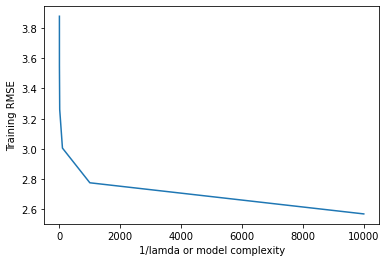

In [39]:
#Plotting training RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Training RMSE')
plt.show()

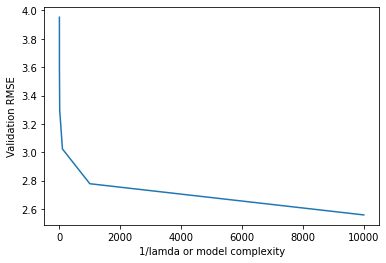

In [40]:
#Plotting validation RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Val_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Validation RMSE')
plt.show()

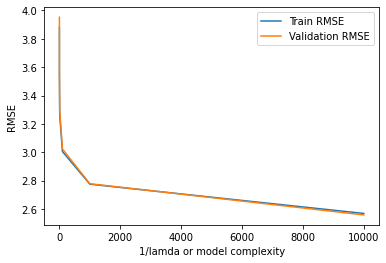

In [41]:
#Plotting combined plot of RMSEs vs 1/lamda :
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.plot([1/lamda for lamda in lamda_values],Val_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('RMSE')
plt.legend(['Train RMSE','Validation RMSE'])
plt.show()

It is clear from the above plots that the best lamda for MSE+lamda*L2(w) among the given value of lamda is 0.0001 

The weights, validation RMSE and validation NRMSE for the same are given in following cells:

In [42]:
print("The weights for lamda = {} are : {}".format(lamda_values[5],W_list[5]))
print("Validation RMSE: {}".format(Val_RMSE[5]))
print("Validation NRMSE: {}".format(Val_NRMSE[5]))

The weights for lamda = 0.0001 are : [ 0.16402481  0.01813317  0.29095671 -0.03585896  0.27562109  0.12287888
  0.18172991  0.58807394  0.03333822  0.60213398  0.36842526 -0.15785958
  0.76830987  0.25807518  0.65838166  0.07232035  0.2161092   0.415929
  0.70282923 -0.03346265  0.30834854  0.        ]
Validation RMSE: 2.5588544087831258
Validation NRMSE: 2.074320831950551


In [43]:
print('Validation RMSE list: ',Val_RMSE)

Validation RMSE list:  [3.95176774027322, 3.6007470917274857, 3.2962958931821382, 3.023549111801842, 2.7786151682818234, 2.5588544087831258]


Q4. For L1_loss function:

In [44]:
w = np.random.rand(22) #Taking 22 random values for weights
lamda_values = [2,1,0.1,0.01,0.001,0.0001] #Taking arbitrarily
Val_RMSE = [] #Created empty lists for storing the results.
Val_NRMSE=[]
Train_RMSE = []
W_list = []
for lamda in lamda_values:  
  w_final, train_loss_final, validation_loss_final, validation_NRMSE = Gradient_Descent(X_train, X_val, t_train, t_val, w, lamda, 1000, 1e-10, 1e-5, L1_Loss,L1_Gradient)
  w = w_final  #Accessing the final weight obtained which minimizes the loss function 
  Val_RMSE.append((MSE_Loss(X_val, t_val, w, lamda =0))**(0.5)) #Adding validation RmSE for the obtained weights and the data
  Val_NRMSE.append(validation_NRMSE) #Adding validation NRMSE for the obtained weights and the data(directly taken from output of gradient descent function)
  Train_RMSE.append((MSE_Loss(X_train, t_train, w, lamda =0))**(0.5)) ##Adding Train RmSE for the obtained weights and the data
  W_list.append(w) #Adding the final weights into list

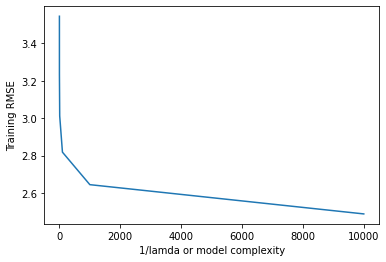

In [45]:
#Plotting training RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Training RMSE')
plt.show()

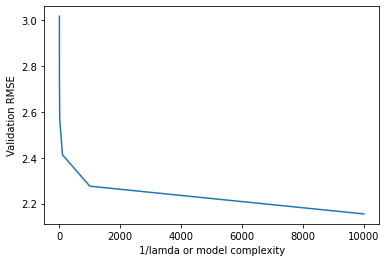

In [46]:
#Plotting validation RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Val_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Validation RMSE')
plt.show()

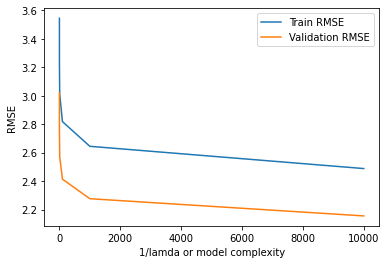

In [47]:
#Plotting combined plot of RMSEs vs 1/lamda :
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.plot([1/lamda for lamda in lamda_values],Val_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('RMSE')
plt.legend(['Train RMSE','Validation RMSE'])
plt.show()

It is clear from the above plots that the best lamda for MSE+lamda*L1(w) among the given value of lamda is 0.0001 

The weights, validation RMSE and validation NRMSE for the same are given in following cells:

In [48]:
print("The weights for lamda = {} are : {}".format(lamda_values[5],W_list[5]))
print("Validation RMSE: {}".format(Val_RMSE[5]))
print("Validation NRMSE: {}".format(Val_NRMSE[5]))

The weights for lamda = 0.0001 are : [ 0.1804936   0.81707418  0.10428682  0.38156399  0.49057455  0.82820336
  0.48708515  0.04037224  0.08751701  0.1053858   0.18700211  0.38377815
  0.02935042  0.38112717 -0.0143876   0.04581396  0.08697351  0.72981169
  0.78082791  0.25384439  0.18777258  0.        ]
Validation RMSE: 2.1550671880843524
Validation NRMSE: 1.7469930087278156


In [49]:
print('Validation RMSE list: ',Val_RMSE)

Validation RMSE list:  [3.0182727443171675, 2.7531490898018047, 2.569885833225566, 2.4134223921221354, 2.276081232407283, 2.1550671880843524]


Q5. For Pseudo Inverse Method:

In [50]:
w = np.random.rand(22) #Taking 22 random values for weights
lamda_values = [2,1,0.1,0.01,0.001,0.0001] #Taking arbitrarily
Val_RMSE = [] #Created empty lists for storing the results.
Val_NRMSE=[]
Train_RMSE = []
W_list = []
for lamda in lamda_values:  
  w = Pseudo_Inverse(X_train,t_train,lamda) #Calculating the weight using the pseudo inverse method
  Val_RMSE.append((MSE_Loss(X_val, t_val, w, lamda =0))**(0.5))  #Adding validation RmSE for the obtained weights and the data
  Val_NRMSE.append(NRMSE_Metric (X_val, t_val, w, lamda=0)) #Adding validation NRMSE for the obtained weights and the data(directly taken from output of gradient descent function)
  Train_RMSE.append((MSE_Loss(X_train, t_train, w, lamda =0))**(0.5)) ##Adding Train RmSE for the obtained weights and the data
  W_list.append(w) #Adding the final weights into list

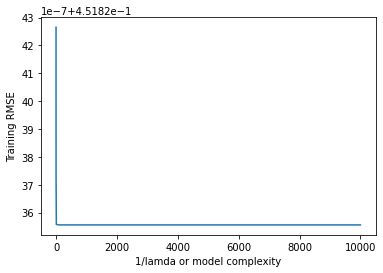

In [51]:
#Plotting training RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Training RMSE')
plt.show()

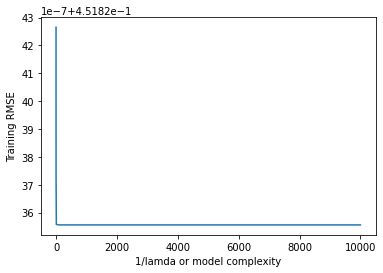

In [52]:
#Plotting training RMSE vs 1/lamda plot:
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('Training RMSE')
plt.show()

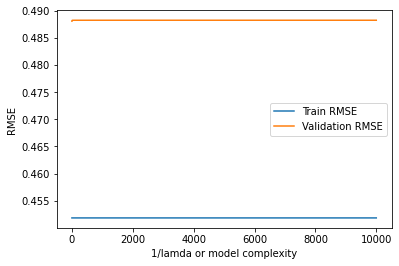

In [53]:
#Plotting combined plot of RMSEs vs 1/lamda :
plt.plot([1/lamda for lamda in lamda_values],Train_RMSE)
plt.plot([1/lamda for lamda in lamda_values],Val_RMSE)
plt.xlabel('1/lamda or model complexity')
plt.ylabel('RMSE')
plt.legend(['Train RMSE','Validation RMSE'])
plt.show()

In [54]:
Val_RMSE

[0.4880738772529533,
 0.4881606099252087,
 0.4882392390280085,
 0.48824713184445734,
 0.4882479214262872,
 0.48824800038747335]

In [55]:
Train_RMSE

[0.4518242652934961,
 0.4518237339474333,
 0.45182355730376283,
 0.4518235555283343,
 0.45182355551057096,
 0.4518235555103933]

It is clear from the above plots and the lists of validation and train RMSE that the best lamda for pseudo inverse method among the given values of lamda is 0.0001 as we get the minimum training RMSE for lamda = 0.0001 . 

The weights, validation RMSE and validation NRMSE for the same are given in following cells:

In [56]:
print("The weights for lamda = {} are : {}".format(lamda_values[5],W_list[5]))
print("Validation RMSE: {}".format(Val_RMSE[5]))
print("Validation NRMSE: {}".format(Val_NRMSE[5]))

The weights for lamda = 0.0001 are : [ 0.12390215  0.02201961  0.18047647 -0.05146351  0.64864216  0.04183878
 -0.10932469  0.0871062  -0.13434915 -0.03926407 -0.06541825 -0.1085924
 -0.03232209  0.07619018 -0.00714663  0.00530631 -0.02844956 -0.0355254
 -0.08094203  0.09084592  0.03193756 -0.02778214]
Validation RMSE: 0.48824800038747335
Validation NRMSE: 0.3957954758526375


In [57]:
print('Validation RMSE list: ',Val_RMSE)

Validation RMSE list:  [0.4880738772529533, 0.4881606099252087, 0.4882392390280085, 0.48824713184445734, 0.4882479214262872, 0.48824800038747335]


Q6. We observe that the best lamda for all the loss functions is lamda = 0.0001 , since validation and training RMSE are lowest for this value of lamda. 
Also both the validation and training RMSEs decrease with increasing the complexity of model i.e. decreasing the value of lamda.

The validation RMSE are less than the training RMSE for L1 and L2 loss methods but the case is reverse in the case of the pseudpo inverse method.

Q7.

In [58]:
test_df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/TempTest.csv") #accessing the tes data set as a dataframe from the link

In [59]:
#Normalizing the test data
for column in test_df.columns :
  test_df[column] = (test_df[column]-test_df[column].mean())/test_df[column].std()

In [60]:
test_df = np.array(test_df) #Converting the dataframe into a numpy array for aplying all the functions defined in the part 1

Since L1 loss method is best among all of the above three methods. So , we will use this method for the prediction in the test dataset.

In [61]:
w_final, train_loss_final, validation_loss_final, validation_NRMSE = Gradient_Descent(X_train, X_val, t_train, t_val, w, 0.0001, 1000, 1e-10, 1e-5, L1_Loss,L1_Gradient) #Using the gradient descent function with L1_Loss and L1_Gradient with best lamda = 0.0001
w = w_final #Extracting the weight vector for which value of loss is minimium
t_predicted = Prediction(test_df, w) #Predicting the value for t using the prediction function.

In [62]:
t_df = pd.DataFrame(t_predicted) #Creating a data frame for the predicted values of t.
t_df.columns = ['Next_Tmax'] #Writing the column name
#t_df.to_csv('21i190003_21i190006_1.csv') #Storing the data of the dataframe into the named csv file

In [63]:
#The predicted data for the Validation data of best model. i.e. L1 Loss function
t_pre = Prediction(X_val,w)

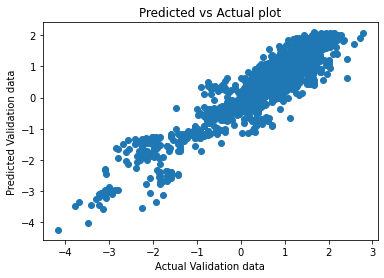

In [64]:
#Plotting the plot of predicted vs actual plot for the validation data for the best model (L1 model)
plt.scatter(t_val,t_pre)
plt.xlabel("Actual Validation data")
plt.ylabel("Predicted Validation data")
plt.title("Predicted vs Actual plot")
plt.show()


R^2 value:

In [65]:
corr_matrix = np.corrcoef(t_val,t_pre) #Finding the matrix showing correlation between validation t and predicted t.
R_sq = (corr_matrix[0][1])**2 #Accessing the cross variance from the correlation matrix and then squaring it
print('R^2 value: ',R_sq)

R^2 value:  0.8576378542658991


#**... Part 2 ends.**

1. Write the name or roll no.s of friends from outside your group with whom you discussed the assignment here (no penalty for mere discussion without copying code): Abhishek Gupta(21i190005)
2. Write the links of sources on the internet referred here (no penalty for mere consultation without copying code): 1.  https://www.askpython.com/python/examples/split-data-training-and-testing-set 2. https://www.askpython.com/python/coefficient-of-determination

